# Smoothing Splines in Python

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mcycle = pd.read_csv("C:/Users/julia/OneDrive/Desktop/Statistics notes/w292024/smooting_splines/mcycle.csv")
mcycle

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

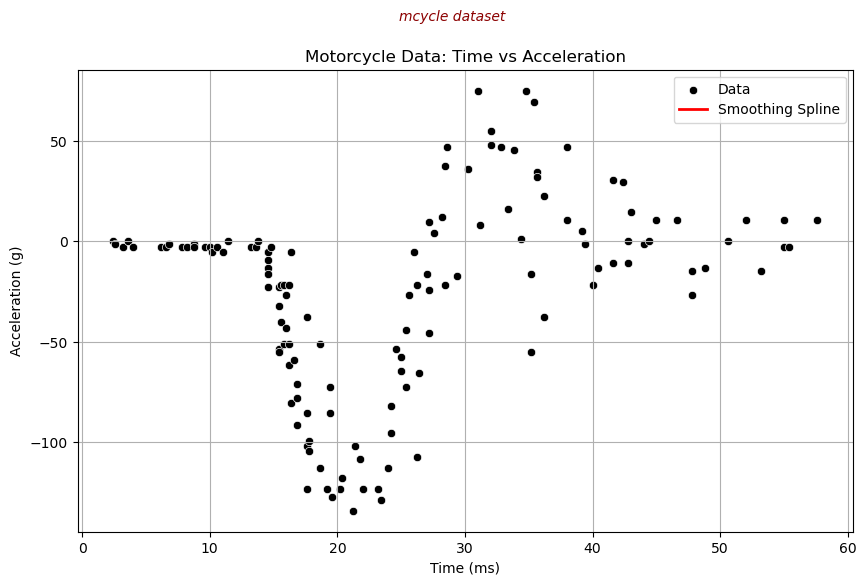

In [18]:
# Fit smoothing splines model with default number of knots
times = mcycle['times']
accel = mcycle['accel']
spline = UnivariateSpline(times, accel, s=None)

# Create a dataframe with the fitted values for plotting
times_fine = np.linspace(times.min(), times.max(), 1000)
accel_fine = spline(times_fine)

# Check the contents of accel_fine to ensure it doesn't contain NaN values
print(accel_fine)

fit = pd.DataFrame({'times': times_fine, 'accel': accel_fine})

# Plot original data points and fitted smoothing spline
plt.figure(figsize=(10, 6))
sns.scatterplot(x='times', y='accel', data=mcycle, color='black', label='Data')
plt.plot(fit['times'], fit['accel'], color='red', label='Smoothing Spline', linewidth=2)
plt.title('Motorcycle Data: Time vs Acceleration')
plt.suptitle('mcycle dataset', fontsize=10, style='italic', color='darkred')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()